In [1]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# let's print the shape of the dataset

In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [137]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [138]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
num = 100
images = X_train[:num]
labels = y_train[:num]

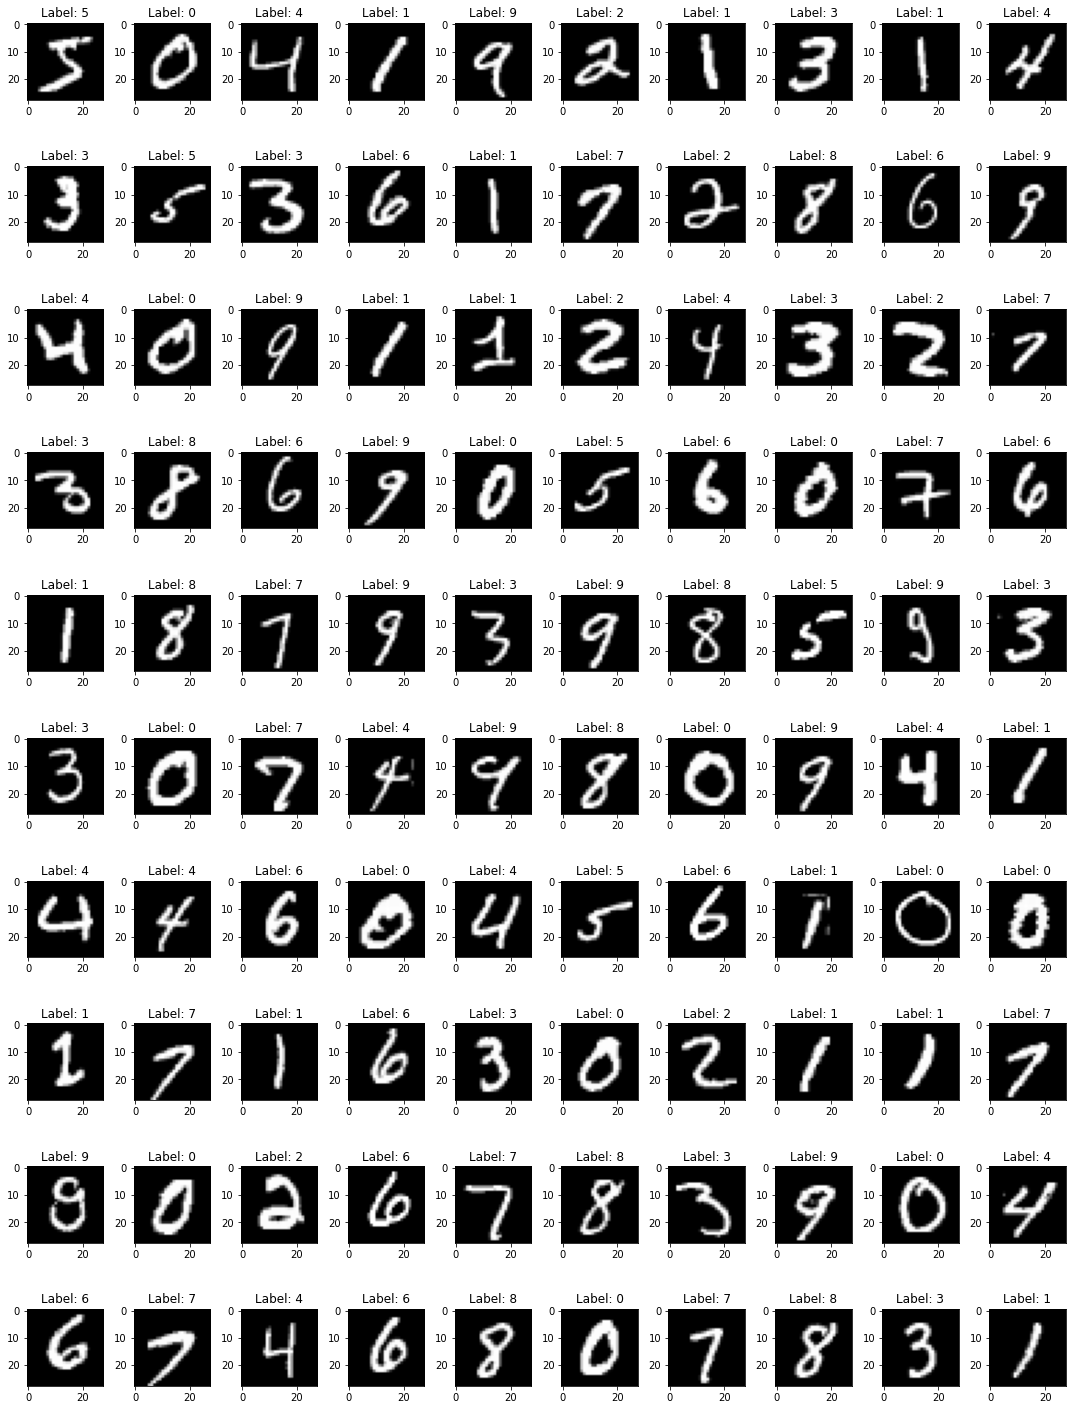

In [5]:
import matplotlib.pyplot as plt

num_row = 10
num_col = 10# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

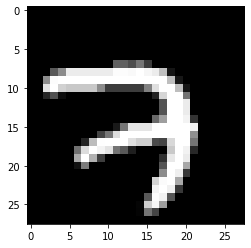

In [6]:
# pick a sample to plot
sample = 5000
image = X_train[sample]# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
plt.show()

In [8]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [145]:
X_train[0].shape

(28, 28, 1)

In [5]:
# Normalize the image pixel values (divide by 255)
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [147]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [149]:
y_train[15]

7

In [157]:
Y_train[15]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# convolutional layer
model.add(Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 100)       22600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 100)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 100)               5760100   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

2022-02-03 13:28:54.878547: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# training the model for 10 epochs
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 81s 171ms/step - loss: 0.1357 - accuracy: 0.9595 - val_loss: 0.0500 - val_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 81s 174ms/step - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0434 - val_accuracy: 0.9866
Epoch 3/10
469/469 [==============================] - 91s 194ms/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.0384 - val_accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 94s 200ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0409 - val_accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 95s 203ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0475 - val_accuracy: 0.9867
Epoch 6/10
469/469 [==============================] - 104s 221ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.0483 - val_accuracy: 0.9876
Epoch 7/10
469/469 [==============================] - 97s 207ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0482 - val_a

In [82]:
X_test[1].shape
y_test[1]

2

In [51]:
pred = model.predict(X_test[:1])
np.around(pred[0])

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Test

In [53]:
!pip install image

^C


In [196]:
# from PIL import Image
# im = Image.open("data\\4.jpg")

from skimage.io import imread
im = imread("data\\4.jpg")

In [165]:
im.shape

(28, 28)

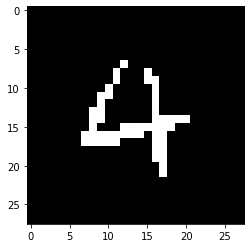

In [197]:
# pick a sample to plot
fig = plt.figure
plt.imshow(im, cmap='gray')
plt.show()

In [169]:
#Flatten image
im

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [198]:
test_images = np.array(im)
test_images = test_images.reshape(1, 28, 28, 1)
test_images.shape

(1, 28, 28, 1)

In [103]:
y_test[2]

1

In [199]:
pred = model.predict(test_images)
np.around(pred[0])

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [92]:
b_test = [1, 0, 3, 4, 5, 0, 2, 1]
b_test = [5, 4, 3, 2, 1, 1, 5, 4, 6, 0]
np_utils.to_categorical(b_test, num_classes=7)

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)